Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labesl:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


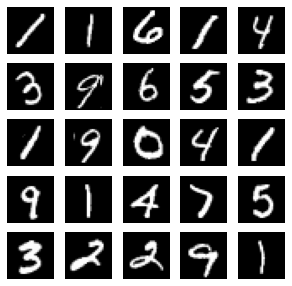

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()
unique, counts = np.unique(y_train,return_counts=True)
print("Train labels: ", dict(zip(unique,counts)))
print("Test labesl: ",dict(zip(unique,counts)))
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = x_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis("off")
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2056)              1613960   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2056)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2106368   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 3,730,578
Trainable params: 3,730,578
Non-trainable params: 0
_________________________________________________________________


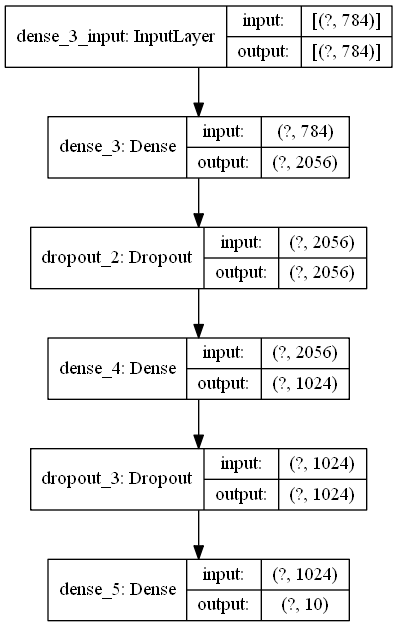

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import pydot

(x_train,y_train),(x_test,y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size

x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255

batch_size = 128

model = Sequential()
model.add(Dense(units=2056,activation='relu',input_dim=input_size))
model.add(Dropout(0.25))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.summary()
plot_model(model,show_shapes=True)

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=20,batch_size=batch_size)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2051 - accuracy: 0.9381
Epoch 2/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0917 - accuracy: 0.9714
Epoch 3/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0661 - accuracy: 0.9792
Epoch 4/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0531 - accuracy: 0.9826
Epoch 5/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0439 - accuracy: 0.9858
Epoch 6/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0362 - accuracy: 0.9885
Epoch 7/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0359 - accuracy: 0.9881
Epoch 8/20
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0303 - accuracy: 0.9898
Epoch 9/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0252 - accuracy: 0.9918
Epoc

In [8]:
_,acc = model.evaluate(x_test,y_test,batch_size=batch_size,
                      verbose=1)
print("\nThe test accuracy: %.1f%%" % (100.0*acc))
print(_)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.1074 - accuracy: 0.9811

The test accuracy: 98.1%
0.107382488194912


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,1])
x_test = np.reshape(x_test,[-1,image_size,image_size,1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size,image_size,1)
batch_size = 128

model = Sequential()
model.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3),input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,activation='relu',kernel_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,activation="relu",kernel_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = 10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          batch_size=batch_size)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.1606 - accuracy: 0.9517 - val_loss: 0.0511 - val_accuracy: 0.9825


In [10]:
loss,acc = model.evaluate(x_test,y_test,batch_size=batch_size)

10000/10000 [==============================] - 3s 350us/sample - loss: 0.0511 - accuracy: 0.9825


In [12]:
print("Test Accuracy for the model is %.1f%%"%(100.0*acc))

Test Accuracy for the model is 98.3%
